<a href="https://colab.research.google.com/github/sacrafont/JPEG-ARTIFACT-REMOVER/blob/main/gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

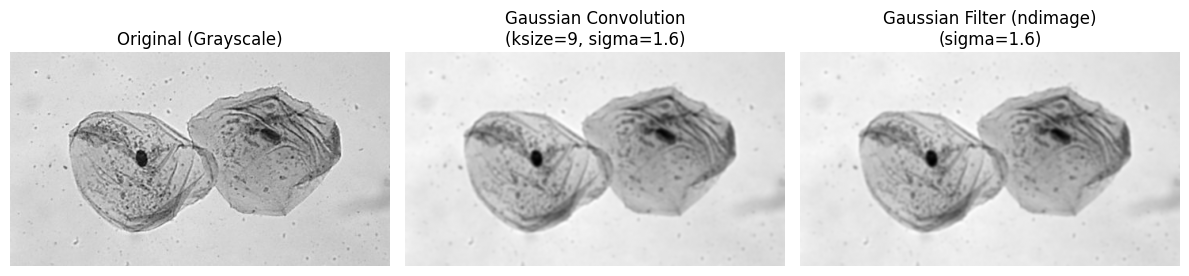

In [1]:
!pip install numpy scipy matplotlib pillow requests

import requests, io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

url = "https://ichef.bbci.co.uk/images/ic/480xn/p01chfyr.jpg"
response = requests.get(url, timeout=20)
response.raise_for_status()

img = Image.open(io.BytesIO(response.content)).convert("L")
img_np = np.asarray(img).astype(np.float32) / 255.0

def make_gaussian_kernel(ksize=9, sigma=1.6):
    assert ksize % 2 == 1
    ax = np.arange(-(ksize // 2), ksize // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    kernel /= kernel.sum()
    return kernel

ksize, sigma = 9, 1.6
gk = make_gaussian_kernel(ksize, sigma)
img_gauss_conv = convolve2d(img_np, gk, mode='same', boundary='symm')
img_gauss_ref = gaussian_filter(img_np, sigma=sigma)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title("Original (Grayscale)")
plt.imshow(img_np, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title(f"Gaussian Convolution\n(ksize={ksize}, sigma={sigma})")
plt.imshow(img_gauss_conv, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title(f"Gaussian Filter (ndimage)\n(sigma={sigma})")
plt.imshow(img_gauss_ref, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
